***Carga de bibliotecas***

In [21]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA
from statsmodels.multivariate.factor import Factor
%matplotlib inline

***Carga del dataset***

In [22]:
data = pd.read_csv('/content/drive/MyDrive/ESCOM/8vo Semestre/Data Mining/Extraordinario/Longley.csv')
data.head(5)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
0,83.0,234.289,235.6,159.0,107.608,60.323
1,88.5,259.426,232.5,145.6,108.632,61.122
2,88.2,258.054,368.2,161.6,109.773,60.171
3,89.5,284.599,335.1,165.0,110.929,61.187
4,96.2,328.975,209.9,309.9,112.075,63.221


In [23]:
data.dtypes

GNP.deflator    float64
GNP             float64
Unemployed      float64
Armed.Forces    float64
Population      float64
Employed        float64
dtype: object

***Análisis de componenetes principales***

El análisis de componentes principales son métodos de reducción de datos que se utilizan para volver a expresar datos multivariados con menos dimensiones. El objetivo de este método es reorientar los datos para que una multitud de variables originales se puedan resumir con relativamente pocos factores o componentes que capturen la máxima información posible de las variables originales.

El objetivo de la PCA es encontrar el componente z = [z1, z2, z3 ......] que son combinaciones lineales de las variables originales xy una cantidad para la máxima varianza posible.

DESCRIPCIÓN Un conjunto de datos macroeconómicos que proporciona un ejemplo bien conocido de regresión altamente colineal. Este marco de datos consta de 6 variables económicas, observadas anualmente desde 1947-62 

1) defaltor del PNB defaltor de precios implícito del PNB (producto nacional bruto) 

2) desempleados no. de desempleados 

3) Fuerzas Armadas no. de personas en las fuerzas armadas 

4) población población 'no institucionalizada'> = 14 años de edad 

5) empleada número de personas empleadas. 

6) Producto Nacional Bruto

In [24]:
df = data.drop('Employed',axis=1)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
0,83.0,234.289,235.6,159.0,107.608
1,88.5,259.426,232.5,145.6,108.632
2,88.2,258.054,368.2,161.6,109.773
3,89.5,284.599,335.1,165.0,110.929
4,96.2,328.975,209.9,309.9,112.075


Dado que, haremos PCA en los datos para reducir las dimensiones, sigamos adelante y eliminemos la variable objetivo "employed".

***Visualiación de la tabla de correlación***

In [25]:
correlation = df.corr()
correlation

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
GNP.deflator,1.000000,0.991589,0.620633,0.464744,0.979163
GNP,0.991589,1.000000,0.604261,0.446437,0.991090
Unemployed,0.620633,0.604261,1.000000,-0.177421,0.686552
Armed.Forces,0.464744,0.446437,-0.177421,1.000000,0.364416
Population,0.979163,0.991090,0.686552,0.364416,1.000000


***Visualiación de las tablas de calor***

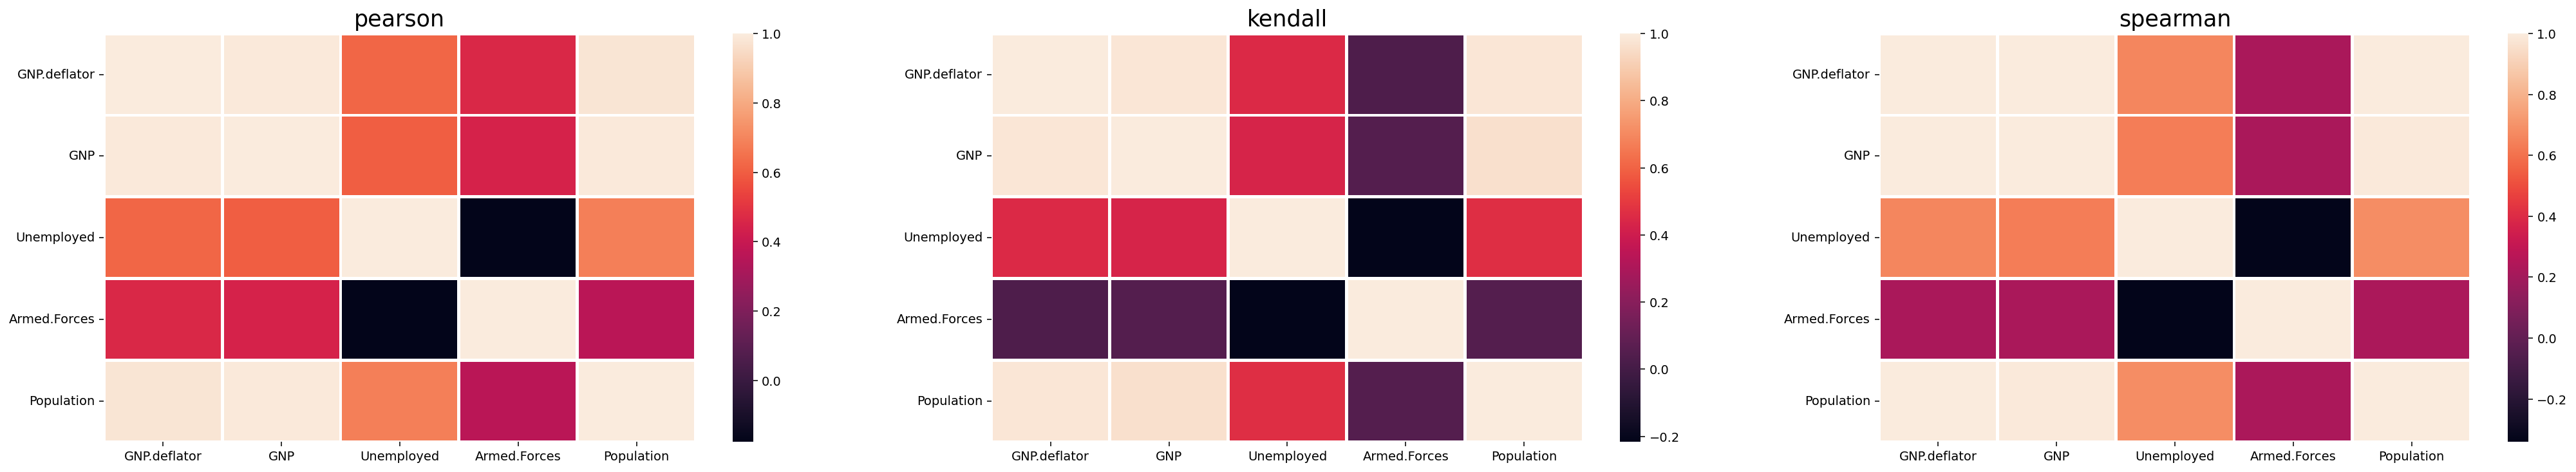

In [26]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

***Visualiación de la tabla modificada***

In [27]:
X = df
X.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
0,83.0,234.289,235.6,159.0,107.608
1,88.5,259.426,232.5,145.6,108.632
2,88.2,258.054,368.2,161.6,109.773
3,89.5,284.599,335.1,165.0,110.929
4,96.2,328.975,209.9,309.9,112.075


***Visualiación de la variable objetivo***

In [28]:
Y = data['Employed']
Y.head()

0    60.323
1    61.122
2    60.171
3    61.187
4    63.221
Name: Employed, dtype: float64

In [29]:
X = sm.add_constant(X)

Esto agrega el término constante beta0 a la regresión lineal múltiple

In [30]:
model =  sm.OLS(Y,X).fit()

***Visualiación del resumen del modelo***

In [31]:
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           3.70e-09
Time:                        07:56:09   Log-Likelihood:                -7.3072
No. Observations:                  16   AIC:                             26.61
Df Residuals:                      10   BIC:                             31.25
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           92.4613     35.169      2.629      0.025      14.099     170.823
GNP.deflator    -0.0485      0.132     -0.366      0.722      -0.343       0.246
GNP              0.0720      0.032      2.269      0.047       0.001       0.143
Unemployed      -0.0040      0.004     -0.921      0.379      -0.014       0.006
Armed.Forces    -0.0056      0.003     -1.975      0.077      -0.012       0.001
Population      -0.4035      0.330     -1.222      0.250      -1.139       0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notas: 

[1] Los errores estándar suponen que la matriz de covarianza de los errores está correctamente especificada. 

[2] El número de condición es grande, 1.74e + 05. Esto podría indicar que hay fuerte multicolinealidad u otros problemas numéricos.

Aquí podemos ver que tenemos una situación de "R ^ 2 alta pero pocas razones t significativas, lo que claramente nos dice que tenemos una situación de multicolinealidad y esto está violando nuestros supuestos de" No multicolinealidad "de regresión MCO.

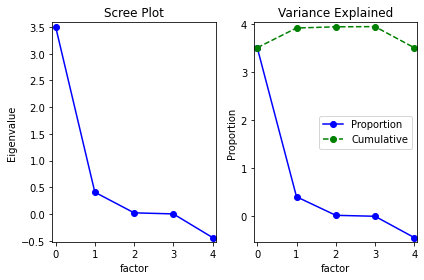

In [32]:
model = Factor(df).fit()
model.plot_scree()
plt.show()

In [33]:
pc = PCA(df,
         ncomp=2,
         standardize=True,
         demean=True,
         normalize=False,
         gls=False,
         weights=None,
         missing=None)

In [34]:
df_comp = pc.loadings.T
df_comp

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
comp_0,0.521013,0.519909,0.365806,0.229642,0.521240
comp_1,-0.058090,-0.053455,0.595323,-0.798315,0.045299


In [35]:
X_factors = pc.factors
X_factors

,comp_0,comp_1
0,-3.204945,0.776652
1,-2.773855,0.877361
2,-2.104761,1.590765
3,-1.929308,1.318500
4,-1.279159,-1.276178
5,-0.893386,-1.985051
6,-0.649108,-1.973110
7,0.098944,-0.612634
8,0.059434,-0.716200
9,0.352178,-0.565773


In [36]:
correlation = X_factors.corr()
correlation

,comp_0,comp_1
comp_0,1.000000e+00,-1.145391e-16
comp_1,-1.145391e-16,1.000000e+00


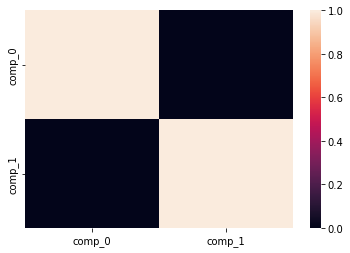

In [37]:
sns.heatmap(X_factors.corr())
plt.show()

Podemos ver que al utilizar la técnica PCA hemos eliminado por completo el problema de la multicolinealidad.

In [38]:
X_pca=sm.add_constant(X_factors)

Esto agrega la constante beta0 a la regresión lineal múltiple.

In [39]:
Y.head()

0    60.323
1    61.122
2    60.171
3    61.187
4    63.221
Name: Employed, dtype: float64

In [40]:
model = sm.OLS(Y,X_pca).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     73.66
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           8.10e-08
Time:                        07:56:10   Log-Likelihood:                -22.188
No. Observations:                  16   AIC:                             50.38
Df Residuals:                      13   BIC:                             52.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3170      0.269    243.206      0.000      64.737      65.897
comp_0         1.7019      0.141     12.040      0.000       1.397       2.007
comp_1        -0.3802      0.248     -1.535      0.149      -0.915       0.155
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.401
Skew:                          -0.211   Prob(JB):                        0.818
Kurtosis:                       2.349   Cond. No.                         1.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notas: 

[1] Los errores estándar suponen que la matriz de covarianza de los errores está correctamente especificada.